<a href="https://colab.research.google.com/github/substobeme/ML_assignments/blob/main/Tutorial_03_Assignment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget -O dataset.csv https://docs.google.com/spreadsheets/d/1lS9HEz8FreAkCpR_w_ykAHy3oWeQBqiuc_RJyr3dfbE/export?format=csv&gid=1322780754

--2024-09-02 09:09:07--  https://docs.google.com/spreadsheets/d/1lS9HEz8FreAkCpR_w_ykAHy3oWeQBqiuc_RJyr3dfbE/export?format=csv
Resolving docs.google.com (docs.google.com)... 108.177.127.102, 108.177.127.139, 108.177.127.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.102|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-08-1k-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/s43nhapgse7v9tlge498mamats/1725268145000/100752720053680324863/*/1lS9HEz8FreAkCpR_w_ykAHy3oWeQBqiuc_RJyr3dfbE?format=csv [following]
--2024-09-02 09:09:08--  https://doc-08-1k-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/s43nhapgse7v9tlge498mamats/1725268145000/100752720053680324863/*/1lS9HEz8FreAkCpR_w_ykAHy3oWeQBqiuc_RJyr3dfbE?format=csv
Resolving doc-08-1k-sheets.googleusercontent.com (doc-08-1k-sheets.googleusercontent.com)... 142.250.153.132, 2a00:1450:4013:c16::84
Connecting to doc-08-1k-sheets.googleuser

In [3]:
file_path = '/content/dataset.csv'
df = pd.read_csv(file_path)

<ipython-input-3-9adb4d9a2db1>:2: DtypeWarning: Columns (9,14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
df

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,8405600184,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,PO BOX 73,SHERIDAN,WY,82801,...,44.82345,-106.87592,4.0,33.0,56.0,5,836007540.0,NaN,NaN,NaN
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,NaN,GENERAL MUSEUM,NaN,2301 CENTRAL AVENUE,CHEYENNE,WY,82001,...,41.13941,-104.81813,1.0,21.0,56.0,5,237368629.0,201404.0,0.0,0.0
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,NaN,HISTORIC PRESERVATION,NaN,1273 N 15TH ST STE 121,LARAMIE,WY,82072,...,41.32276,-105.57686,3.0,1.0,56.0,5,830318392.0,201312.0,208508.0,83981.0
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,NaN,HISTORY MUSEUM,NaN,PO BOX 704,CHEYENNE,WY,82003,...,41.13010,-104.81916,1.0,21.0,56.0,5,830295570.0,201309.0,0.0,0.0


# EDA

Code up the following concepts with regards to EDA.

*   Correlation
*   Mean, median, mode
In addition, write down inferences from the dataset.

In [5]:
def calculate_correlation_matrix(df):
    columns = df.select_dtypes(include=['float64', 'int64']).columns
    matrix = {col: {col2: 0 for col2 in columns} for col in columns}
    for i in range(len(columns)):
        for j in range(len(columns)):
            c1= columns[i]
            c2 = columns[j]
            mean1 = df[c1].mean()
            mean2 = df[c2].mean()
            covariance = ((df[c1] - mean1) * (df[c2] - mean2)).mean()
            std1 = ((df[c1] - mean1) ** 2).mean() ** 0.5
            std2 = ((df[c2] - mean2) ** 2).mean() ** 0.5
            if std1 > 0 and std2 > 0:
                correlation = covariance / (std1 * std2)
            else:
                correlation = 1000000
            if correlation > 1:
              correlation =1.0
            elif correlation <-1.0:
              correlation=-1
            matrix[c1][c2] = correlation
            matrix[c2][c1] = correlation
    return matrix

def display(matrix):
    print("Correlation Matrix:")
    for i, j in matrix.items():
        print(f"{i}: {j}")





In [6]:
cm = calculate_correlation_matrix(df)
display(cm)




Correlation Matrix:
Museum ID: {'Museum ID': 1.0, 'Zip Code (Physical Location)': -0.06418364304539628, 'Latitude': 0.06658080034214013, 'Longitude': 0.11178303747530424, 'Locale Code (NCES)': 0.04474764527405203, 'County Code (FIPS)': 0.11080484550747093, 'State Code (FIPS)': 0.4764860846877483, 'Region Code (AAM)': -0.06110667399959404, 'Tax Period': -0.04015607960948762, 'Income': 0.09666534116941884, 'Revenue': 0.18131811766602657}
Zip Code (Physical Location): {'Museum ID': -0.06418364304539628, 'Zip Code (Physical Location)': 1.0, 'Latitude': -0.13257278684044357, 'Longitude': -0.9198553660733915, 'Locale Code (NCES)': -0.01877397138872779, 'County Code (FIPS)': 0.0894854225671538, 'State Code (FIPS)': -0.132031068515778, 'Region Code (AAM)': 0.9626218328521261, 'Tax Period': -0.03180002058565889, 'Income': -0.0006114397568914551, 'Revenue': -0.0009215915394331986}
Latitude: {'Museum ID': 0.06658080034214013, 'Zip Code (Physical Location)': -0.13257278684044357, 'Latitude': 1.0, 

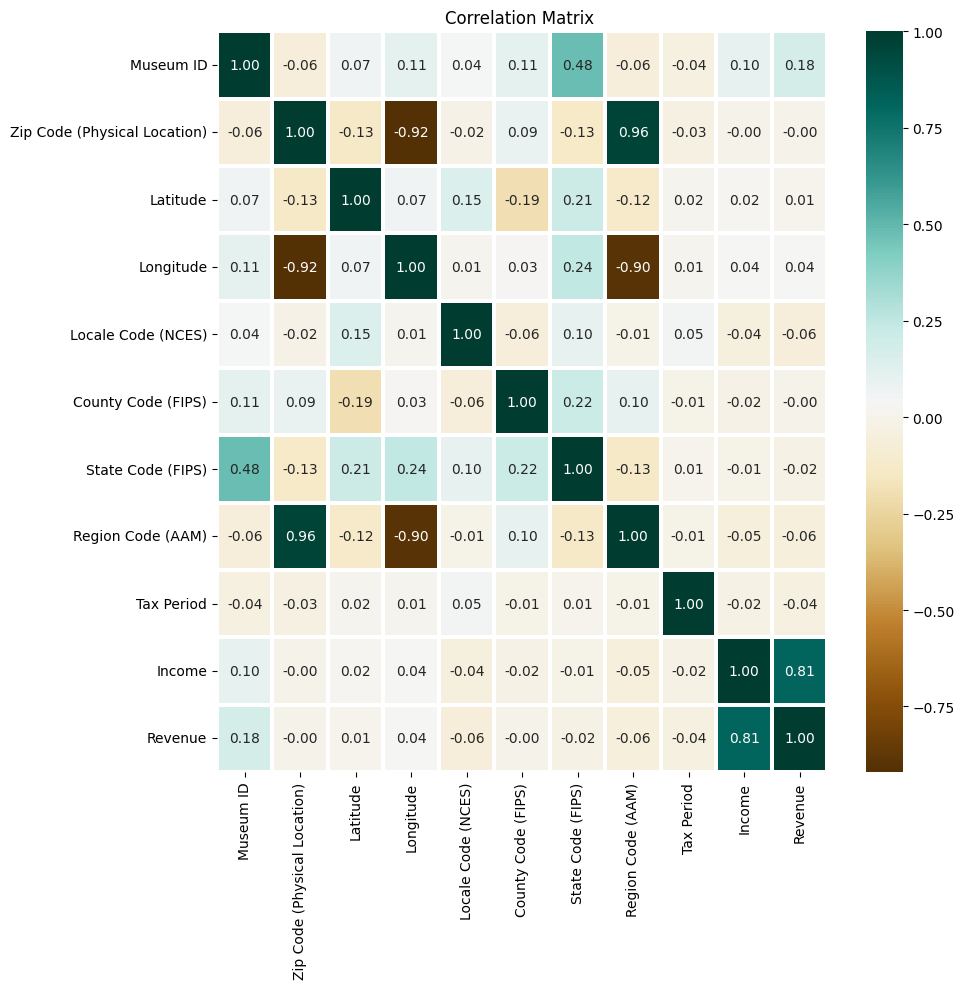

In [7]:
df2 = pd.DataFrame(cm)
plt.figure(figsize=(10, 10))
sns.heatmap(df2, annot=True, fmt=".2f", cmap="BrBG",linewidth=1.7)
plt.title('Correlation Matrix ')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
columns=df.select_dtypes(include=['float64', 'int64']).columns
for col in columns:
  print(f"{col}\n Mean: {df[col].mean()}\n Median: {df[col].median()}\n Mode: {df[col].mode()[0]}")
  # although it doesn't make sense to find mean, median of stuff like country code


Museum ID
 Mean: 8403811638.324988
 Median: 8403600303.5
 Mode: 8400100001
Zip Code (Physical Location)
 Mean: 47805.64461555146
 Median: 47448.0
 Mode: 74743.0
Latitude
 Mean: 38.92537161177932
 Median: 39.83164
 Mode: 40.79792
Longitude
 Mean: -90.81675691732057
 Median: -86.77684
 Mode: -77.86267
Locale Code (NCES)
 Mean: 2.5058342173056523
 Median: 2.0
 Mode: 4.0
County Code (FIPS)
 Mean: 85.70192559601782
 Median: 61.0
 Mode: 1.0
State Code (FIPS)
 Mean: 29.065828066886397
 Median: 29.0
 Mode: 6.0
Region Code (AAM)
 Mean: 3.6700834542815675
 Median: 4.0
 Mode: 4
Tax Period
 Mean: 201347.45854810998
 Median: 201312.0
 Mode: 201312.0
Income
 Mean: 106968188.88071077
 Median: 8781.0
 Mode: 0.0
Revenue
 Mean: 20976047.056931358
 Median: 3307.0
 Mode: 0.0


In [9]:
col_all=df.columns
col2=[]
for x in col_all:
  if x not in columns:
    col2.append(x)
print(col2)
for col in col2:
  print(f"Mode:{df[col].mode()[0]}")

['Museum Name', 'Legal Name', 'Alternate Name', 'Museum Type', 'Institution Name', 'Street Address (Administrative Location)', 'City (Administrative Location)', 'State (Administrative Location)', 'Zip Code (Administrative Location)', 'Street Address (Physical Location)', 'City (Physical Location)', 'State (Physical Location)', 'Phone Number', 'Employer ID Number']
Mode:PLANETARIUM
Mode:PLANETARIUM
Mode:REGENTS OF THE UNIVERSITY OF CALIFORNIA  LOS ANGELES
Mode:HISTORIC PRESERVATION
Mode:PENNSYLVANIA STATE UNIVERSITY
Mode:603 W JACKSON
Mode:NEW YORK
Mode:CA
Mode:74743
Mode:603 W JACKSON
Mode:NEW YORK
Mode:NY
Mode:6605621212
Mode:526002033


# Preprocessing
Code up the following concepts with regards to Preprocessing. Justify the reason for using them for this specific dataset

*   Filling in missing values.
*   Encoding

Any other techniques that you might need, please justify their usage and code them up.

In [10]:
df.drop(['Zip Code (Physical Location)','County Code (FIPS)'],
			axis=1,
			inplace=True)

In [11]:
df.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Phone Number', 'Latitude', 'Longitude',
       'Locale Code (NCES)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

In [12]:
def count_nulls(df):
    null_counts = {}
    for col in df.columns:
        count = 0
        for value in df[col]:
            if pd.isna(value):
                count += 1
        null_counts[col] = count

    return null_counts


In [13]:
count = count_nulls(df)
for col, val in count.items():
    print(f"{col}: {val}")

Museum ID: 0
Museum Name: 0
Legal Name: 0
Alternate Name: 31145
Museum Type: 0
Institution Name: 30323
Street Address (Administrative Location): 10
City (Administrative Location): 0
State (Administrative Location): 0
Zip Code (Administrative Location): 0
Street Address (Physical Location): 23856
City (Physical Location): 23849
State (Physical Location): 23849
Phone Number: 10140
Latitude: 65
Longitude: 65
Locale Code (NCES): 77
State Code (FIPS): 1
Region Code (AAM): 0
Employer ID Number: 5518
Tax Period: 9792
Income: 10111
Revenue: 10782


In [14]:
df.drop(['Alternate Name'],
			axis=1,
			inplace=True)

In [15]:
df.drop(['Institution Name','Street Address (Physical Location)','Region Code (AAM)'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Museum Type',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Phone Number', 'Latitude', 'Longitude',
       'Locale Code (NCES)', 'State Code (FIPS)', 'Employer ID Number',
       'Tax Period', 'Income', 'Revenue'],
      dtype='object')

In [17]:
def fill_nulls1(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_value = df[col].mean()
        for i in range(len(df)):
            if pd.isna(df[col][i]):
                df[col][i] = mean_value
    return df

fill_nulls1(df)

Streaming output truncated to the last 5000 lines.
<ipython-input-17-7cd185ea59fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean_value
<ipython-input-17-7cd185ea59fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean_value
<ipython-input-17-7cd185ea59fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mean_value
<ipython-input-17-7cd185ea59fd>:6: SettingWithCopyWarning: 
A value is tr

,Museum ID,Museum Name,Legal Name,Museum Type,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),City (Physical Location),State (Physical Location),Phone Number,Latitude,Longitude,Locale Code (NCES),State Code (FIPS),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,NaN,NaN,9072485325,61.17925,-149.97254,1.0,2.0,920071852,201312.000000,6.029120e+05,5.502360e+05
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,NaN,NaN,9077703692,61.16890,-149.76708,4.0,2.0,920115504,201312.000000,1.379576e+06,1.323742e+06
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,9711 KENAI SPUR HWY,KENAI,AK,99611,NaN,NaN,9072832000,60.56149,-151.21598,3.0,2.0,921761906,201312.000000,7.400300e+05,7.290800e+05
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,214 BIRCH STREET,KENAI,AK,99611,NaN,NaN,2142472478,60.56280,-151.26597,3.0,2.0,920165178,201412.000000,0.000000e+00,0.000000e+00
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,NaN,9072652834,61.17925,-149.97254,1.0,2.0,920071852,201312.000000,6.029120e+05,5.502360e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,8405600184,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,HISTORIC PRESERVATION,PO BOX 73,SHERIDAN,WY,82801,SHERIDAN,WY,3076751150.0,44.82345,-106.87592,4.0,56.0,836007540.0,201347.458548,1.069682e+08,2.097605e+07
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,GENERAL MUSEUM,2301 CENTRAL AVENUE,CHEYENNE,WY,82001,CHEYENNE,WY,3077777022.0,41.13941,-104.81813,1.0,56.0,237368629.0,201404.000000,0.000000e+00,0.000000e+00
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,HISTORIC PRESERVATION,1273 N 15TH ST STE 121,LARAMIE,WY,82072,NaN,NaN,NaN,41.32276,-105.57686,3.0,56.0,830318392.0,201312.000000,2.085080e+05,8.398100e+04
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,HISTORY MUSEUM,PO BOX 704,CHEYENNE,WY,82003,CHEYENNE,WY,3076323905.0,41.13010,-104.81916,1.0,56.0,830295570.0,201309.000000,0.000000e+00,0.000000e+00


In [18]:
def fill_nulls2(df):
    for col in df.select_dtypes(exclude=['float64', 'int64']).columns:
        mode_value = df[col].mode()[0]
        for i in range(len(df)):
            if pd.isna(df[col][i]):
                df[col][i] = mode_value
    return df

fill_nulls2(df)

Streaming output truncated to the last 5000 lines.
<ipython-input-18-0bf5abe4c4a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mode_value
<ipython-input-18-0bf5abe4c4a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mode_value
<ipython-input-18-0bf5abe4c4a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = mode_value
<ipython-input-18-0bf5abe4c4a7>:6: SettingWithCopyWarning: 
A value is tr

,Museum ID,Museum Name,Legal Name,Museum Type,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),City (Physical Location),State (Physical Location),Phone Number,Latitude,Longitude,Locale Code (NCES),State Code (FIPS),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,NEW YORK,NY,9072485325,61.17925,-149.97254,1.0,2.0,920071852,201312.000000,6.029120e+05,5.502360e+05
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,NEW YORK,NY,9077703692,61.16890,-149.76708,4.0,2.0,920115504,201312.000000,1.379576e+06,1.323742e+06
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,9711 KENAI SPUR HWY,KENAI,AK,99611,NEW YORK,NY,9072832000,60.56149,-151.21598,3.0,2.0,921761906,201312.000000,7.400300e+05,7.290800e+05
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,214 BIRCH STREET,KENAI,AK,99611,NEW YORK,NY,2142472478,60.56280,-151.26597,3.0,2.0,920165178,201412.000000,0.000000e+00,0.000000e+00
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NEW YORK,NY,9072652834,61.17925,-149.97254,1.0,2.0,920071852,201312.000000,6.029120e+05,5.502360e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,8405600184,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,HISTORIC PRESERVATION,PO BOX 73,SHERIDAN,WY,82801,SHERIDAN,WY,3076751150.0,44.82345,-106.87592,4.0,56.0,836007540.0,201347.458548,1.069682e+08,2.097605e+07
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,GENERAL MUSEUM,2301 CENTRAL AVENUE,CHEYENNE,WY,82001,CHEYENNE,WY,3077777022.0,41.13941,-104.81813,1.0,56.0,237368629.0,201404.000000,0.000000e+00,0.000000e+00
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,HISTORIC PRESERVATION,1273 N 15TH ST STE 121,LARAMIE,WY,82072,NEW YORK,NY,6605621212,41.32276,-105.57686,3.0,56.0,830318392.0,201312.000000,2.085080e+05,8.398100e+04
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,HISTORY MUSEUM,PO BOX 704,CHEYENNE,WY,82003,CHEYENNE,WY,3076323905.0,41.13010,-104.81916,1.0,56.0,830295570.0,201309.000000,0.000000e+00,0.000000e+00


In [19]:
count = count_nulls(df)
for col, val in count.items():
    print(f"{col}: {val}")

Museum ID: 0
Museum Name: 0
Legal Name: 0
Museum Type: 0
Street Address (Administrative Location): 0
City (Administrative Location): 0
State (Administrative Location): 0
Zip Code (Administrative Location): 0
City (Physical Location): 0
State (Physical Location): 0
Phone Number: 0
Latitude: 0
Longitude: 0
Locale Code (NCES): 0
State Code (FIPS): 0
Employer ID Number: 0
Tax Period: 0
Income: 0
Revenue: 0


In [ ]:
def ONE(df):
    cols = df.select_dtypes(exclude=['float64', 'int64']).columns
    for col in cols:
        unique_values = df[col].unique()
        for value in unique_values:
            df[value] = (df[col] == value).astype(int)

        df = df.drop(col, axis=1)

    return df

In [ ]:
df


NameError: name 'df' is not defined

In [ ]:
ONE(df)

Streaming output truncated to the last 5000 lines.
<ipython-input-117-6f169bd76765>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[value] = (df[col] == value).astype(int)
<ipython-input-117-6f169bd76765>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[value] = (df[col] == value).astype(int)
<ipython-input-117-6f169bd76765>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

In [ ]:
# Final dataset

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,153,0,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.000000,6.029120e+05,5.502360e+05
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,153,0,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.000000,1.379576e+06,1.323742e+06
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,3809,0,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.000000,7.400300e+05,7.290800e+05
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,3809,0,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.000000,0.000000e+00,0.000000e+00
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,153,0,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.000000,6.029120e+05,5.502360e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,8405600184,WYOMING STATE HISTORICAL SOCIETY,WYOMING STATE HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,PO BOX 73,7003,50,82801,...,44.82345,-106.87592,4.0,33.0,56.0,5,836007540.0,201347.458548,1.069682e+08,2.097605e+07
33068,8405600061,WYOMING STATE MUSEUM,WYOMING STATE MUSEUM VOLUNTEERS INC,NaN,GENERAL MUSEUM,NaN,2301 CENTRAL AVENUE,1323,50,82001,...,41.13941,-104.81813,1.0,21.0,56.0,5,237368629.0,201404.000000,0.000000e+00,0.000000e+00
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,NaN,HISTORIC PRESERVATION,NaN,1273 N 15TH ST STE 121,4101,50,82072,...,41.32276,-105.57686,3.0,1.0,56.0,5,830318392.0,201312.000000,2.085080e+05,8.398100e+04
33070,8405600137,WYOMING TRANSPORTATION MUSEUM,WYOMING TRANSPORTATION MUSEUM CORP,NaN,HISTORY MUSEUM,NaN,PO BOX 704,1323,50,82003,...,41.13010,-104.81916,1.0,21.0,56.0,5,830295570.0,201309.000000,0.000000e+00,0.000000e+00
